# Import module

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
pd.set_option('display.max_column',85)
from datetime import datetime
nowtime=datetime.now()

# Process Training Data (Miss)

(array([   5.,   16.,   29.,   90.,  148.,  274.,  439.,  619.,  741.,
         871.,  992., 1070., 1131., 1195., 1244., 1280., 1316., 1341.,
        1354., 1379., 1395., 1406., 1410., 1421., 1430., 1435., 1439.,
        1443., 1447., 1449., 1450., 1451., 1452., 1452., 1453., 1453.,
        1455., 1455., 1456., 1456., 1458., 1458., 1458., 1458., 1458.,
        1458., 1458., 1458., 1458., 1460.]),
 array([ 34900.,  49302.,  63704.,  78106.,  92508., 106910., 121312.,
        135714., 150116., 164518., 178920., 193322., 207724., 222126.,
        236528., 250930., 265332., 279734., 294136., 308538., 322940.,
        337342., 351744., 366146., 380548., 394950., 409352., 423754.,
        438156., 452558., 466960., 481362., 495764., 510166., 524568.,
        538970., 553372., 567774., 582176., 596578., 610980., 625382.,
        639784., 654186., 668588., 682990., 697392., 711794., 726196.,
        740598., 755000.]),
 <a list of 50 Patch objects>)

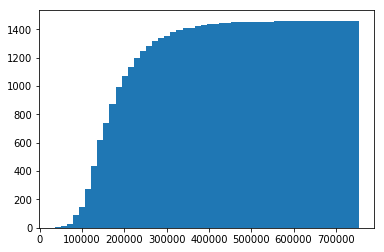

In [2]:
trainDataSet = pd.read_csv('train.csv')
trainDataSet.sample(5)
plt.hist(trainDataSet['SalePrice'],bins = 50,cumulative=True)

### Sperate to value features and Object features

In [3]:
trainData_value = trainDataSet['Id']
trainData_object = trainDataSet['Id']
for i in trainDataSet.columns:
    if trainDataSet[i].dtype != 'object':
        trainData_value = pd.merge(trainData_value, trainDataSet[i], left_index=True, right_index=True)
    else:
        trainData_object = pd.merge(trainData_object, trainDataSet[i], left_index=True, right_index=True)
trainData_value = trainData_value.drop(['Id_x','Id_y'], axis = 1)
trainData_object = trainData_object.drop(['Id'], axis = 1)

### Value features missing value processing 

In [4]:
trainData_value['HouseYr'] = trainData_value['YrSold']-trainData_value['YearBuilt']

try:
    trainData_value = trainData_value.drop(['GarageYrBlt'], axis = 1)
    trainData_value = trainData_value.drop(['LotFrontage'], axis = 1)
    
except:
    print("Have done")
# for i in range(trainData_value.shape[0]):
#         if trainData_value.loc[i,'YearRemodAdd']>trainData_value.loc[i,'YearBuilt']:
#             trainData_object.loc[i,'Remodel'] = 'Y'
#         else:
#             trainData_object.loc[i,'Remodel'] = 'N'        
# print all location of missing value       

for index in np.where(trainData_value['MasVnrArea'].isnull()):
    trainData_value = trainData_value.drop(index).reset_index(drop=True)
    trainData_object = trainData_object.drop(index).reset_index(drop=True)
    # Keep object and value have same number of index
    
# for col in trainData_value.columns:
#     print(col," has na : ",np.where(trainData_value[col].isnull())[0].size)
    
print("After drop some columns the size (value): ",trainData_value.shape)
print("After drop some columns the size (object): ",trainData_object.shape)

After drop some columns the size (value):  (1452, 36)
After drop some columns the size (object):  (1452, 43)


### Object features missing value processing

In [5]:
try:
    trainData_object = trainData_object.drop(['Alley'], axis = 1)
except:
    print("Have done")
    
# for index in np.where(trainData_object['GarageType'].isnull()):
#     trainData_value = trainData_value.drop(index).reset_index(drop=True)
#     trainData_object = trainData_object.drop(index).reset_index(drop=True)
#     # Keep object and value have same number of index    
    
for index in np.where(trainData_object['Electrical'].isnull()):
    trainData_value = trainData_value.drop(index).reset_index(drop=True)
    trainData_object = trainData_object.drop(index).reset_index(drop=True)
     # Keep object and value have same number of index   


Exter_qualDict = {'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1}
Bsmt_qualDict = {'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1,'NA':0}
BsmtEx_qualDict = {'Gd':4,'Av':3,'Mn':2,'No':1,'NA':0}
BsmtFT_qualDict = {'GLQ':6 ,'ALQ':5 ,'BLQ':4 ,'Rec':3 ,'LwQ':2 ,'Unf':1 ,'NA':0}
Heating_qualDict = {'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1}
Kitchen_qualDict = {'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1}
Fireplace_qualDict = {'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1,'NA':0}
GarageFsh_qualDict = {'Fin':3,'RFn':2,'Unf':1,'NA':0}
Garage_qualDict = {'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1,'NA':0}
Pool_qualDict = {'Ex':4,'Gd':3,'TA':2,'Fa':1,'NA':0}
Fence_qualDict = {'GdPrv':4,'MnPrv':3,'GdWo':2,'MnWw':1,'NA':0}

try:
    trainData_object['FireplaceQu'] = trainData_object['FireplaceQu'].fillna('NA')
    trainData_object['BsmtQual'] = trainData_object['BsmtQual'].fillna('NA')
    trainData_object['BsmtCond'] = trainData_object['BsmtCond'].fillna('NA')
    trainData_object['BsmtExposure'] = trainData_object['BsmtExposure'].fillna('NA')
    trainData_object['BsmtFinType1'] = trainData_object['BsmtFinType1'].fillna('NA')
    trainData_object['BsmtFinType2'] = trainData_object['BsmtFinType2'].fillna('NA')
    trainData_object['GarageType'] = trainData_object['GarageType'].fillna('NA')
    trainData_object['GarageFinish'] = trainData_object['GarageFinish'].fillna('NA')
    trainData_object['GarageQual'] = trainData_object['GarageQual'].fillna('NA')
    trainData_object['GarageCond'] = trainData_object['GarageCond'].fillna('NA')
    trainData_object['PoolQC'] = trainData_object['PoolQC'].fillna('NA')
    trainData_object['Fence'] = trainData_object['Fence'].fillna('NA')
    trainData_object['MiscFeature'] = trainData_object['MiscFeature'].fillna('NA')
    for index in range(trainData_object.shape[0]):
        trainData_value.loc[index,'ExterQual'] = Exter_qualDict[trainData_object.loc[index,'ExterQual']]
        trainData_value.loc[index,'ExterCond'] = Exter_qualDict[trainData_object.loc[index,'ExterCond']]
        trainData_value.loc[index,'BsmtQual'] = Bsmt_qualDict[trainData_object.loc[index,'BsmtQual']]
        trainData_value.loc[index,'BsmtCond'] = Bsmt_qualDict[trainData_object.loc[index,'BsmtCond']]
        trainData_value.loc[index,'BsmtExposure'] = BsmtEx_qualDict[trainData_object.loc[index,'BsmtExposure']]
        trainData_value.loc[index,'BsmtFinType1'] = BsmtFT_qualDict[trainData_object.loc[index,'BsmtFinType1']]
        trainData_value.loc[index,'BsmtFinType2'] = BsmtFT_qualDict[trainData_object.loc[index,'BsmtFinType2']]
        trainData_value.loc[index,'HeatingQC'] = Heating_qualDict[trainData_object.loc[index,'HeatingQC']]
        trainData_value.loc[index,'KitchenQual'] = Kitchen_qualDict[trainData_object.loc[index,'KitchenQual']]
        trainData_value.loc[index,'FireplaceQu'] = Fireplace_qualDict[trainData_object.loc[index,'FireplaceQu']]
        trainData_value.loc[index,'GarageFinish'] = GarageFsh_qualDict[trainData_object.loc[index,'GarageFinish']]
        trainData_value.loc[index,'GarageQual'] = Garage_qualDict[trainData_object.loc[index,'GarageQual']]
        trainData_value.loc[index,'GarageCond'] = Garage_qualDict[trainData_object.loc[index,'GarageCond']]
        trainData_value.loc[index,'PoolQC'] = Pool_qualDict[trainData_object.loc[index,'PoolQC']]
        trainData_value.loc[index,'Fence'] = Fence_qualDict[trainData_object.loc[index,'Fence']]
    trainData_object = trainData_object.drop(['ExterQual','ExterCond','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','HeatingQC','KitchenQual','FireplaceQu','GarageFinish','GarageQual','GarageCond','PoolQC','Fence'],axis=1)
except:
    print("Drop Done")
# for col in trainData_object.columns:
#     print(col," has na : ",np.where(trainData_object[col].isnull())[0].size)
trainData_object_wPrice = pd.merge(trainData_object,trainData_value['SalePrice'],left_index=True,right_index=True)    
print("After drop some columns the size (value): ",trainData_value.shape)
print("After drop some columns the size (object): ",trainData_object.shape)

After drop some columns the size (value):  (1451, 51)
After drop some columns the size (object):  (1451, 27)


In [6]:
trainData_value.sample(10)

,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,HouseYr,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,HeatingQC,KitchenQual,FireplaceQu,GarageFinish,GarageQual,GarageCond,PoolQC,Fence
539,60,11000,8,5,2000,2000,72.0,0,0,969,969,997,1288,0,2285,0,0,2,1,4,1,8,1,3,648,0,56,0,0,0,0,0,6,2007,248000,7,4.0,3.0,4.0,3.0,1.0,1.0,1.0,5.0,4.0,3.0,3.0,3.0,3.0,0.0,0.0
387,20,9382,7,5,1999,2000,125.0,0,0,1468,1468,1479,0,0,1479,0,0,2,0,3,1,6,0,2,577,120,25,0,0,0,0,0,7,2008,191000,9,4.0,3.0,4.0,3.0,1.0,1.0,1.0,5.0,4.0,0.0,2.0,3.0,3.0,0.0,0.0
391,20,8339,5,7,1959,1959,0.0,0,0,0,0,882,0,0,882,0,0,1,0,3,1,5,0,1,294,0,0,0,0,0,0,1200,7,2007,106500,48,3.0,3.0,0.0,0.0,0.0,0.0,0.0,3.0,3.0,0.0,2.0,3.0,3.0,0.0,3.0
146,30,6120,5,7,1931,1993,0.0,209,0,506,715,875,0,0,875,1,0,1,0,2,1,5,0,1,180,48,0,0,0,0,0,0,11,2009,105000,78,3.0,3.0,3.0,3.0,1.0,4.0,1.0,3.0,3.0,0.0,1.0,2.0,3.0,0.0,0.0
477,20,10637,8,5,2007,2008,336.0,1288,0,417,1705,1718,0,0,1718,1,0,2,0,3,1,7,1,3,826,208,44,0,0,0,0,0,9,2009,297000,2,4.0,3.0,5.0,3.0,4.0,6.0,1.0,5.0,4.0,4.0,2.0,3.0,3.0,0.0,0.0
362,160,1680,6,8,1972,2007,510.0,162,0,321,483,483,504,0,987,0,0,1,1,2,1,5,0,1,264,250,0,0,0,0,0,0,5,2009,118000,37,3.0,3.0,3.0,3.0,1.0,5.0,1.0,4.0,4.0,0.0,1.0,3.0,3.0,0.0,0.0
253,20,8400,5,6,1957,1957,0.0,922,0,392,1314,1314,0,0,1314,1,0,1,0,3,1,5,0,1,294,250,0,0,0,0,0,0,6,2010,145000,53,3.0,4.0,3.0,3.0,1.0,3.0,1.0,3.0,3.0,0.0,2.0,3.0,3.0,0.0,0.0
1233,20,9037,8,5,2006,2006,32.0,428,0,1048,1476,1484,0,0,1484,0,0,2,0,2,1,6,1,2,472,120,33,0,0,0,0,0,12,2007,265900,1,4.0,3.0,4.0,3.0,3.0,6.0,1.0,5.0,5.0,4.0,2.0,3.0,3.0,0.0,0.0
68,30,4608,4,6,1945,1950,0.0,0,0,747,747,747,0,0,747,0,0,1,0,2,1,4,0,1,220,0,0,0,0,0,0,0,6,2010,80000,65,3.0,4.0,3.0,3.0,1.0,1.0,1.0,3.0,3.0,0.0,1.0,3.0,3.0,0.0,0.0
845,50,45600,6,8,1908,1997,0.0,0,0,907,907,1307,1051,0,2358,0,0,3,0,5,1,10,1,2,360,486,40,0,0,175,0,0,9,2008,240000,100,3.0,3.0,3.0,3.0,1.0,1.0,1.0,3.0,3.0,4.0,1.0,2.0,3.0,0.0,0.0


### Correlation Analysis

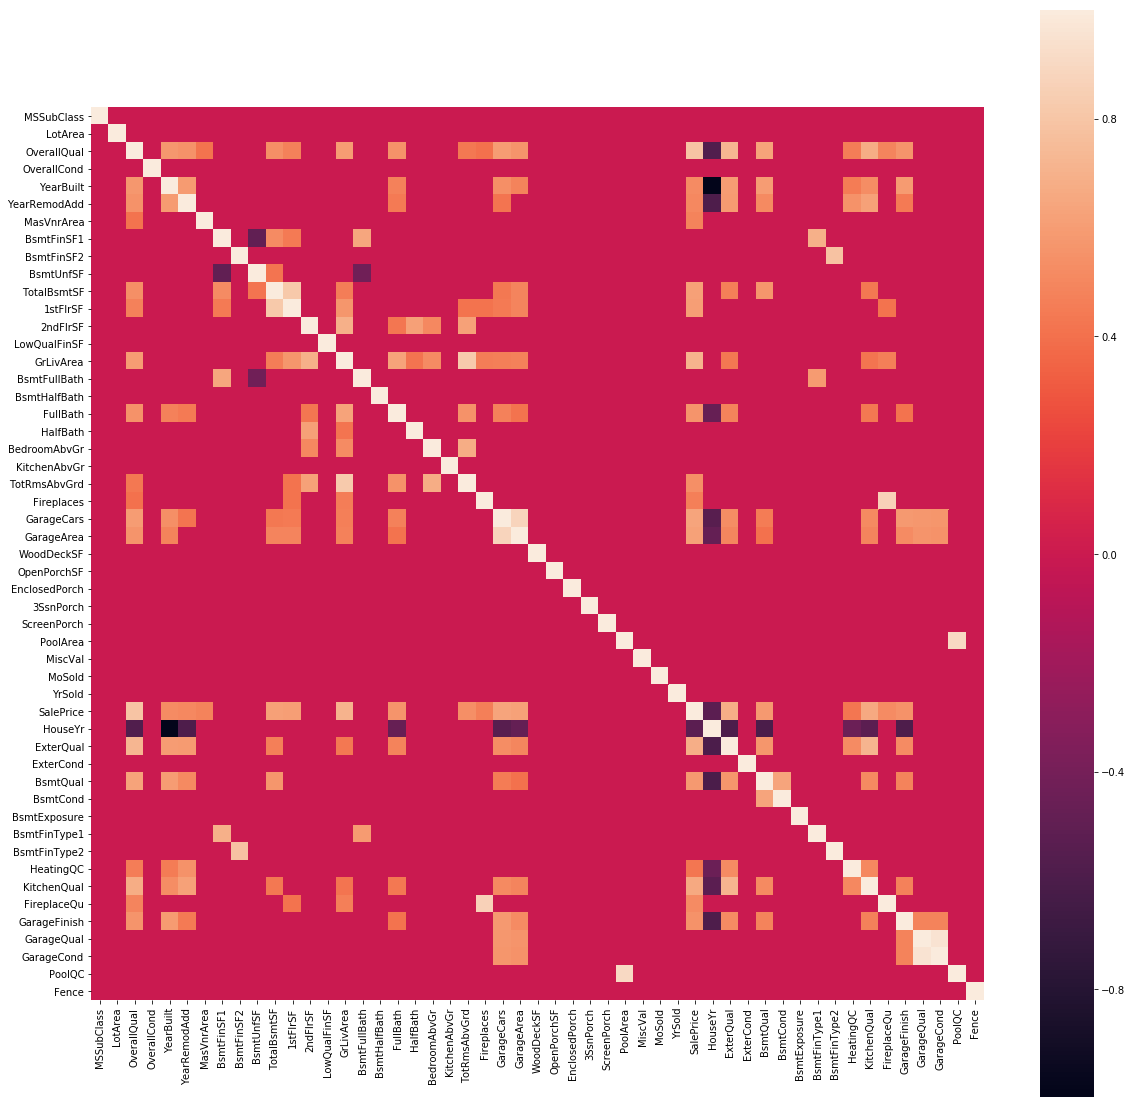

In [190]:
train_corr = trainData_value.corr()
train_corr[(train_corr<0.4) & (train_corr>-0.4)]=0
corr_list=[]
for col in train_corr.columns:
    if col != 'SalePrice':
        if train_corr.loc['SalePrice',col]>0.2 or train_corr.loc['SalePrice',col]<-0.2:
            corr_list.append(col)
import seaborn as sns
plt.figure(figsize=(20,20))
sns.heatmap(train_corr, square=True)

In [191]:
trainDataSet_valueFiltered = trainData_value.copy()
for col in trainDataSet_valueFiltered.columns:
    if col not in corr_list:
        trainDataSet_valueFiltered = trainDataSet_valueFiltered.drop([col],axis=1)
try:
    trainDataSet_valueFiltered = trainDataSet_valueFiltered.drop(['YearBuilt','YearRemodAdd'],axis=1)
except:
    print()
trainDataSet_valueFiltered.sample(5)
try:
    trainDataSet_valueFiltered = trainDataSet_valueFiltered.drop('MasVnrArea',axis=1)
except:
    print()

### Class variance analysis

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,Foundation,Heating,CentralAir,Electrical,Functional,GarageType,PavedDrive,MiscFeature,SaleType,SaleCondition
753,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,None,PConc,GasA,Y,SBrkr,Typ,Attchd,Y,NA,WD,Normal
1430,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,SLvl,Hip,CompShg,HdBoard,HdBoard,BrkFace,CBlock,GasA,Y,SBrkr,Typ,Attchd,Y,NA,WD,Normal
223,RL,Pave,Reg,Lvl,AllPub,FR2,Gtl,NAmes,Norm,Norm,1Fam,1Story,Gable,CompShg,HdBoard,HdBoard,None,CBlock,GasA,Y,SBrkr,Typ,Detchd,Y,NA,WD,Abnorml
468,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,SawyerW,RRNe,Norm,1Fam,2Story,Gable,CompShg,HdBoard,HdBoard,BrkFace,PConc,GasA,Y,SBrkr,Typ,Attchd,Y,NA,WD,Normal
809,C (all),Grvl,Reg,Bnk,AllPub,Inside,Mod,IDOTRR,Norm,Norm,1Fam,1Story,Hip,CompShg,Wd Sdng,Wd Sdng,None,CBlock,GasA,N,FuseA,Typ,Basment,N,Shed,WD,Alloca


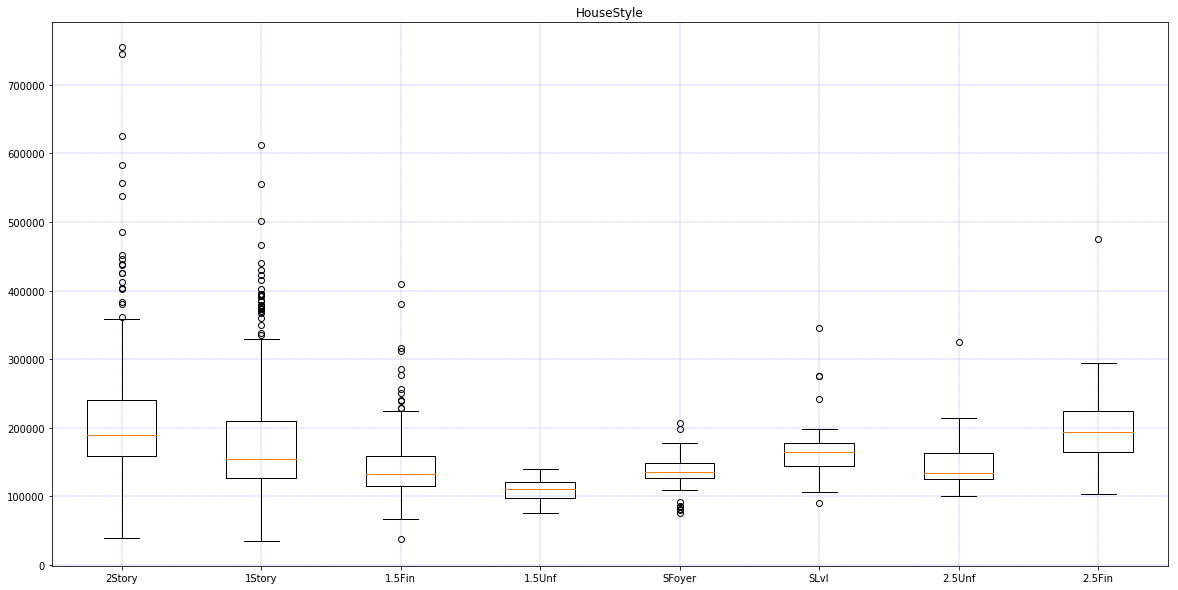

In [192]:
import warnings
warnings.filterwarnings('ignore')


object_list=[]
Item = "HouseStyle"
plt.figure(1,figsize=(20,10))
for i in trainData_object_wPrice[Item].unique():
    pltbox = plt.subplot()
    object_list.append(trainData_object_wPrice[trainData_object_wPrice[Item]==i]['SalePrice'])
pltbox.boxplot(object_list)
plt.xticks(range(1,1+len(trainData_object_wPrice[Item].unique())),trainData_object_wPrice[Item].unique())
plt.grid(color='b', linestyle='--', linewidth=0.2)
plt.title(Item)
trainData_object.sample(5)  

# choosing : CentralAir Heating, MSZoning, HouseStyle

In [193]:
trainData_objectFilter = trainData_object[['CentralAir','Heating','HouseStyle','SaleType']]
trainData_objectFilter_OneHot = pd.DataFrame(trainData_objectFilter['CentralAir'])

for col in trainData_objectFilter.columns:
    trainData_objectFilter_OneHot = pd.merge(trainData_objectFilter_OneHot,pd.get_dummies(trainData_objectFilter[col]),left_index=True,right_index=True)
trainData_objectFilter_OneHot = trainData_objectFilter_OneHot.drop(['CentralAir'],axis=1)

trainData_objectFilter_OneHot.sample(5)

,N,Y,Floor,GasA,GasW,Grav,OthW,Wall,1.5Fin,1.5Unf,1Story,2.5Fin,2.5Unf,2Story,SFoyer,SLvl,COD,CWD,Con,ConLD,ConLI,ConLw,New,Oth,WD
263,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1
196,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0
965,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0
108,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
997,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1


### Filtered Data Processing

In [194]:
trainData = pd.merge(trainDataSet_valueFiltered,trainData_objectFilter_OneHot,left_index=True, right_index=True)
#trainData = trainDataSet_valueFiltered
labelData = trainData_value['SalePrice']


temp = pd.merge(trainData ,labelData ,left_index=True, right_index=True)
temp = temp[(temp['SalePrice']<300000)]

trainData = temp.drop(['SalePrice'],axis=1)
labelData = temp['SalePrice']
trainData.shape

(1337, 41)

# PCA

In [195]:
# from sklearn import decomposition
# pca = decomposition.PCA(21)
# pca.fit(trainData)
# trainData = pca.transform(trainData)

### Import Scikit-Learn Module

In [196]:
from sklearn.linear_model import SGDRegressor,Lasso ,Ridge, ElasticNet
import xgboost as xgb
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [210]:
X_train, X_test, y_train, y_test = train_test_split(trainData,labelData,test_size=0.3)

StdObject = StandardScaler()
StdObject.fit(trainData)

X_trainStd = StdObject.transform(X_train)
X_testStd = StdObject.transform(X_test)

y_train = y_train.values.ravel()
y_test = y_test.values.ravel()

In [228]:
estimator = xgb.XGBRegressor(n_estimators=71,max_depth=4)
estimator.fit(X_trainStd, y_train)
print("R score %.2f "%estimator.score(X_testStd, y_test))
print("RMSE : %.2f"%np.sqrt(np.mean((estimator.predict(X_testStd) - y_test)**2)))

R score 0.86 
RMSE : 20567.96


### Test file Preocessing

In [80]:
testDataSet = pd.read_csv('test.csv')

In [81]:
testData_value = testDataSet['Id']
testData_object = testDataSet['Id']
for i in testDataSet.columns:
    if testDataSet[i].dtype != 'object':
        testData_value = pd.merge(testData_value, testDataSet[i], left_index=True, right_index=True)
    else:
        testData_object = pd.merge(testData_object, testDataSet[i], left_index=True, right_index=True)
testData_value = testData_value.drop(['Id_x','Id_y'], axis = 1)
testData_object = testData_object.drop(['Id'], axis = 1)


In [82]:
testData_value['HouseYr'] = testData_value['YrSold']-testData_value['YearBuilt']

try:
    testData_value = testData_value.drop(['GarageYrBlt'], axis = 1)
    testData_value = testData_value.drop(['LotFrontage'], axis = 1)
    
except:
    print("Have done")

# for index in np.where(testData_value['MasVnrArea'].isnull()):
#     testData_value = testData_value.drop(index).reset_index(drop=True)
#     testData_object = testData_object.drop(index).reset_index(drop=True)
#     # Keep object and value have same number of index
    
# for col in testData_value.columns:
#     print(col," has na : ",np.where(testData_value[col].isnull())[0].size)
    
print("After drop some columns the size (value): ",testData_value.shape)
print("After drop some columns the size (object): ",testData_object.shape)

After drop some columns the size (value):  (1461, 35)
After drop some columns the size (object):  (1461, 43)


In [83]:
try:
    testData_object = testData_object.drop(['Alley'], axis = 1)
except:
    print("Have done")
    
# for index in np.where(testData_object['GarageType'].isnull()):
#     testData_value = testData_value.drop(index).reset_index(drop=True)
#     testData_object = testData_object.drop(index).reset_index(drop=True)
#     # Keep object and value have same number of index    
    
for index in np.where(testData_object['Electrical'].isnull()):
    testData_value = testData_value.drop(index).reset_index(drop=True)
    testData_object = testData_object.drop(index).reset_index(drop=True)
     # Keep object and value have same number of index   


Exter_qualDict = {'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1}
Bsmt_qualDict = {'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1,'NA':0}
BsmtEx_qualDict = {'Gd':4,'Av':3,'Mn':2,'No':1,'NA':0}
BsmtFT_qualDict = {'GLQ':6 ,'ALQ':5 ,'BLQ':4 ,'Rec':3 ,'LwQ':2 ,'Unf':1 ,'NA':0}
Heating_qualDict = {'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1}
Kitchen_qualDict = {'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1}
Fireplace_qualDict = {'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1,'NA':0}
GarageFsh_qualDict = {'Fin':3,'RFn':2,'Unf':1,'NA':0}
Garage_qualDict = {'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1,'NA':0}
Pool_qualDict = {'Ex':4,'Gd':3,'TA':2,'Fa':1,'NA':0}
Fence_qualDict = {'GdPrv':4,'MnPrv':3,'GdWo':2,'MnWw':1,'NA':0}

try:
    testData_object['FireplaceQu'] = testData_object['FireplaceQu'].fillna('NA')
    testData_object['BsmtQual'] = testData_object['BsmtQual'].fillna('NA')
    testData_object['BsmtCond'] = testData_object['BsmtCond'].fillna('NA')
    testData_object['BsmtExposure'] = testData_object['BsmtExposure'].fillna('NA')
    testData_object['BsmtFinType1'] = testData_object['BsmtFinType1'].fillna('NA')
    testData_object['BsmtFinType2'] = testData_object['BsmtFinType2'].fillna('NA')
    testData_object['GarageType'] = testData_object['GarageType'].fillna('NA')
    testData_object['GarageFinish'] = testData_object['GarageFinish'].fillna('NA')
    testData_object['GarageQual'] = testData_object['GarageQual'].fillna('NA')
    testData_object['GarageCond'] = testData_object['GarageCond'].fillna('NA')
    testData_object['PoolQC'] = testData_object['PoolQC'].fillna('NA')
    testData_object['Fence'] = testData_object['Fence'].fillna('NA')
    testData_object['MiscFeature'] = testData_object['MiscFeature'].fillna('NA')
    testData_object['KitchenQual'] = testData_object['KitchenQual'].fillna('TA')
    for index in range(testData_object.shape[0]):
        testData_value.loc[index,'ExterQual'] = Exter_qualDict[testData_object.loc[index,'ExterQual']]
        testData_value.loc[index,'ExterCond'] = Exter_qualDict[testData_object.loc[index,'ExterCond']]
        testData_value.loc[index,'BsmtQual'] = Bsmt_qualDict[testData_object.loc[index,'BsmtQual']]
        testData_value.loc[index,'BsmtCond'] = Bsmt_qualDict[testData_object.loc[index,'BsmtCond']]
        testData_value.loc[index,'BsmtExposure'] = BsmtEx_qualDict[testData_object.loc[index,'BsmtExposure']]
        testData_value.loc[index,'BsmtFinType1'] = BsmtFT_qualDict[testData_object.loc[index,'BsmtFinType1']]
        testData_value.loc[index,'BsmtFinType2'] = BsmtFT_qualDict[testData_object.loc[index,'BsmtFinType2']]
        testData_value.loc[index,'HeatingQC'] = Heating_qualDict[testData_object.loc[index,'HeatingQC']]
        testData_value.loc[index,'KitchenQual'] = Kitchen_qualDict[testData_object.loc[index,'KitchenQual']]
        testData_value.loc[index,'FireplaceQu'] = Fireplace_qualDict[testData_object.loc[index,'FireplaceQu']]
        testData_value.loc[index,'GarageFinish'] = GarageFsh_qualDict[testData_object.loc[index,'GarageFinish']]
        testData_value.loc[index,'GarageQual'] = Garage_qualDict[testData_object.loc[index,'GarageQual']]
        testData_value.loc[index,'GarageCond'] = Garage_qualDict[testData_object.loc[index,'GarageCond']]
        testData_value.loc[index,'PoolQC'] = Pool_qualDict[testData_object.loc[index,'PoolQC']]
        testData_value.loc[index,'Fence'] = Fence_qualDict[testData_object.loc[index,'Fence']]
    testData_object = testData_object.drop(['ExterQual','ExterCond','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','HeatingQC','KitchenQual','FireplaceQu','GarageFinish','GarageQual','GarageCond','PoolQC','Fence'],axis=1)
except:
    print("Drop Done")


print("After drop some columns the size (value): ",testData_value.shape)
print("After drop some columns the size (object): ",testData_object.shape)

After drop some columns the size (value):  (1461, 50)
After drop some columns the size (object):  (1461, 27)


In [84]:
testData_value['TotalBsmtSF'] = testData_value['TotalBsmtSF'].fillna(testData_value['TotalBsmtSF'].mean())
testData_value['GarageCars'] = testData_value['GarageCars'].fillna(testData_value['GarageCars'].mean())
testData_value['GarageArea'] = testData_value['GarageArea'].fillna(testData_value['GarageArea'].mean())

# for col in testData_object.columns:
#     print(col," has na : ",np.where(testData_object[col].isnull())[0].size)
# print("------------------------------------------")
# for col in testData_value.columns:
#     print(col," has na : ",np.where(testData_value[col].isnull())[0].size)
# corr_list

In [85]:
testDataSet_valueFiltered = testData_value.copy()
for col in testDataSet_valueFiltered.columns:
    if col not in corr_list:
        testDataSet_valueFiltered = testDataSet_valueFiltered.drop([col],axis=1)
try:
    testDataSet_valueFiltered = testDataSet_valueFiltered.drop(['YearBuilt','YearRemodAdd'],axis=1)
except:
    print()

testDataSet_valueFiltered = testDataSet_valueFiltered.drop('MasVnrArea',axis=1)
testDataSet_valueFiltered.sample(5)

,OverallQual,TotalBsmtSF,1stFlrSF,GrLivArea,FullBath,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,HouseYr,ExterQual,BsmtQual,HeatingQC,KitchenQual,FireplaceQu,GarageFinish
394,6,520.0,1338,1338.0,1,5,1,2.0,576.0,26,4.0,4.0,4.0,4.0,1.0,1.0
89,5,928.0,928,1536.0,2,7,1,2.0,480.0,80,3.0,3.0,3.0,3.0,4.0,1.0
844,6,1302.0,1302,1302.0,1,5,1,2.0,631.0,2,4.0,4.0,5.0,4.0,4.0,2.0
869,6,941.0,961,1644.0,2,7,1,2.0,460.0,8,3.0,4.0,5.0,3.0,3.0,2.0
506,8,1582.0,1582,1582.0,2,7,0,3.0,905.0,1,4.0,5.0,5.0,4.0,0.0,3.0


In [86]:
testData_objectFilter = testData_object[['CentralAir','Heating','HouseStyle','SaleType']]
testData_objectFilter_OneHot = pd.DataFrame(testData_objectFilter['CentralAir'])

for col in testData_objectFilter.columns:
    testData_objectFilter_OneHot = pd.merge(testData_objectFilter_OneHot,pd.get_dummies(testData_objectFilter[col]),left_index=True,right_index=True)
testData_objectFilter_OneHot = testData_objectFilter_OneHot.drop(['CentralAir'],axis=1)

testData_objectFilter_OneHot.sample(5)

,N,Y,Floor,GasA,GasW,Grav,Othw,Wall,1.5Fin,1.5Unf,1Story,2.5Fin,2.5Unf,2Story,SFoyer,SLvl,COD,CWD,Con,ConLD,ConLI,ConLw,New,Oth,WD
199,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1267,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1
498,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
1165,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1
46,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1


In [87]:
testData = pd.merge(testDataSet_valueFiltered,testData_objectFilter_OneHot,left_index=True, right_index=True)
#testData = testDataSet_valueFiltered
testData_objectFilter_OneHot.shape
testData = testData.dropna()
testData.shape

from sklearn import decomposition
pca = decomposition.PCA(20)
pca.fit(testData)
testData = pca.transform(testData)

In [88]:
testStd = StdObject.transform(testData)
Price = estimator.predict(testStd).T

In [89]:
prediction = pd.DataFrame(np.array([range(1461,2920),Price]).T,columns=('Id','SalePrice'))#.to_csv('Submission.csv',index=False)
prediction['Id'] = prediction['Id'].astype('int32')
prediction.to_csv('Submission.csv',index=False)